## 1.Numpy基础数据结构

NumPy数组是一个多维数组对象，称为ndarray。其由两部分组成：
① 实际的数据
② 描述这些数据的元数据

In [1]:
# 多维数组ndarray

import numpy as np

ar = np.array([1,2,3,4,5,6,7])
print(ar)          # 输出数组，注意数组的格式：中括号，元素之间没有逗号（和列表区分）
print(ar.ndim)     # 输出数组维度的个数（轴数），或者说“秩”，维度的数量也称rank
print(ar.shape)    # 数组的维度，对于n行m列的数组，shape为（n，m）
print(ar.size)     # 数组的元素总数，对于n行m列的数组，元素总数为n*m
print(ar.dtype)    # 数组中元素的类型，类似type()（注意了，type()是函数，.dtype是方法）
print(ar.itemsize) # 数组中每个元素的字节大小，int32l类型字节为4，float64的字节为8
print(ar.data)     # 包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。
ar   # 交互方式下输出，会有array(数组)

# 数组的基本属性
# ① 数组的维数称为秩（rank），一维数组的秩为1，二维数组的秩为2，以此类推
# ② 在NumPy中，每一个线性的数组称为是一个轴（axes），秩其实是描述轴的数量：
# 比如说，二维数组相当于是两个一维数组，其中第一个一维数组中每个元素又是一个一维数组
# 所以一维数组就是NumPy中的轴（axes），第一个轴相当于是底层数组，第二个轴是底层数组里的数组。
# 而轴的数量——秩，就是数组的维数。 

[1 2 3 4 5 6 7]
1
(7,)
7
int32
4


array([1, 2, 3, 4, 5, 6, 7])

In [2]:
# 创建数组：array()函数，括号内可以是列表、元组、数组、生成器等

ar1 = np.array(range(10))   # 整型
ar2 = np.array([1,2,3.14,4,5])   # 浮点型
ar3 = np.array([[1,2,3],('a','b','c')])   # 二维数组：嵌套序列（列表，元组均可）
ar4 = np.array([[1,2,3],('a','b','c','d')])   # 注意嵌套序列数量不一会怎么样
print(ar1,type(ar1),ar1.dtype)
print(ar2,type(ar2),ar2.dtype)
print(ar3,ar3.shape,ar3.ndim,ar3.size)     # 二维数组，共6个元素
print(ar4,ar4.shape,ar4.ndim,ar4.size)     # 一维数组，共2个元素

[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'> int32
[ 1.    2.    3.14  4.    5.  ] <class 'numpy.ndarray'> float64
[['1' '2' '3']
 ['a' 'b' 'c']] (2, 3) 2 6
[[1, 2, 3] ('a', 'b', 'c', 'd')] (2,) 1 2


In [3]:
# 创建数组：arange()，类似range()，在给定间隔内返回均匀间隔的值。

print(np.arange(10))    # 返回0-9，整型
print(np.arange(10.0))  # 返回0.0-9.0，浮点型
print(np.arange(5,12))  # 返回5-11
print(np.arange(5.0,12,2))  # 返回5.0-12.0，步长为2
print(np.arange(10000))  # 如果数组太大而无法打印，NumPy会自动跳过数组的中心部分，并只打印边角：

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
[ 5  6  7  8  9 10 11]
[  5.   7.   9.  11.]
[   0    1    2 ..., 9997 9998 9999]


In [4]:
# 创建数组：linspace():返回在间隔[开始，停止]上计算的num个均匀间隔的样本。

ar1 = np.linspace(2.0, 3.0, num=5)
ar2 = np.linspace(2.0, 3.0, num=5, endpoint=False)
ar3 = np.linspace(2.0, 3.0, num=5, retstep=True)

print(ar1,type(ar1))
print(ar2)
print(ar3,type(ar3))

# numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
# start：起始值，stop：结束值
# num：生成样本数，默认为50
# endpoint：如果为真，则停止是最后一个样本。否则，不包括在内。默认值为True。
# retstep：如果为真，返回（样本，步长），其中步长是样本之间的间距 → 输出为一个包含2个元素的元组，第一个元素为array，第二个为步长实际值

[ 2.    2.25  2.5   2.75  3.  ] <class 'numpy.ndarray'>
[ 2.   2.2  2.4  2.6  2.8]
(array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ]), 0.25) <class 'tuple'>


In [5]:
# 创建数组：zeros()/zeros_like()/ones()/ones_like()

ar1 = np.zeros(5)  
ar2 = np.zeros((2,2), dtype = np.int)
print(ar1,ar1.dtype)
print(ar2,ar2.dtype)
print('------')
# numpy.zeros(shape, dtype=float, order='C'):返回给定形状和类型的新数组，用零填充。
# shape：数组纬度，二维以上需要用()，且输入参数为整数
# dtype：数据类型，默认numpy.float64
# order：是否在存储器中以C或Fortran连续（按行或列方式）存储多维数据。

ar3 = np.array([list(range(5)),list(range(5,10))])
ar4 = np.zeros_like(ar3)
print(ar3)
print(ar4)
print('------')
# 返回具有与给定数组相同的形状和类型的零数组，这里ar4根据ar3的形状和dtype创建一个全0的数组

ar5 = np.ones(9)
ar6 = np.ones((2,3,4))
ar7 = np.ones_like(ar3)
print(ar5)
print(ar6)
print(ar7)
# ones()/ones_like()和zeros()/zeros_like()一样，只是填充为1

[ 0.  0.  0.  0.  0.] float64
[[0 0]
 [0 0]] int32
------
[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 0 0 0 0]
 [0 0 0 0 0]]
------
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]]
[[1 1 1 1 1]
 [1 1 1 1 1]]


In [6]:
# 创建数组：eye()

print(np.eye(5))
# 创建一个正方的N*N的单位矩阵，对角线值为1，其余为0

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


ndarray的数据类型

* bool	用一个字节存储的布尔类型（True或False）
* inti	由所在平台决定其大小的整数（一般为int32或int64）
* int8	一个字节大小，-128 至 127
* int16	整数，-32768 至 32767
* int32	整数，-2 ** 31 至 2 ** 32 -1 
* int64	整数，-2 ** 63 至 2 ** 63 - 1
* uint8	无符号整数，0 至 255 
* uint16	无符号整数，0 至 65535
* uint32	无符号整数，0 至 2 ** 32 - 1
* uint64	无符号整数，0 至 2 ** 64 - 1 
* float16	半精度浮点数：16位，正负号1位，指数5位，精度10位
* float32	单精度浮点数：32位，正负号1位，指数8位，精度23位 
* float64或float	双精度浮点数：64位，正负号1位，指数11位，精度52位
* complex64	复数，分别用两个32位浮点数表示实部和虚部 
* complex128或complex	复数，分别用两个64位浮点数表示实部和虚部

## 2.Numpy通用函数

* 基本操作


In [7]:
# 数组形状：.T/.reshape()/.resize()

ar1 = np.arange(10)
ar2 = np.ones((5,2))
print(ar1,'\n',ar1.T)
print(ar2,'\n',ar2.T)
print('------')
# .T方法：转置，例如原shape为(3,4)/(2,3,4)，转置结果为(4,3)/(4,3,2) → 所以一维数组转置后结果不变

ar3 = ar1.reshape(2,5)     # 用法1：直接将已有数组改变形状             
ar4 = np.zeros((4,6)).reshape(3,8)   # 用法2：生成数组后直接改变形状
ar5 = np.reshape(np.arange(12),(3,4))   # 用法3：参数内添加数组，目标形状
print(ar1,'\n',ar3)
print(ar4)
print(ar5)
print('------')
# numpy.reshape(a, newshape, order='C')：为数组提供新形状，而不更改其数据，所以元素数量需要一致！！

ar6 = np.resize(np.arange(5),(3,4))
print(ar6)
# numpy.resize(a, new_shape)：返回具有指定形状的新数组，如有必要可重复填充所需数量的元素。
# 注意了：.T/.reshape()/.resize()都是生成新的数组！！！

[0 1 2 3 4 5 6 7 8 9] 
 [0 1 2 3 4 5 6 7 8 9]
[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]] 
 [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
------
[0 1 2 3 4 5 6 7 8 9] 
 [[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
------
[[0 1 2 3]
 [4 0 1 2]
 [3 4 0 1]]


In [8]:
# 数组的复制

ar1 = np.arange(10)
ar2 = ar1
print(ar2 is ar1)
ar1[2] = 9
print(ar1,ar2)
# 回忆python的赋值逻辑：指向内存中生成的一个值 → 这里ar1和ar2指向同一个值，所以ar1改变，ar2一起改变

ar3 = ar1.copy()
print(ar3 is ar1)
ar1[0] = 9
print(ar1,ar3)
# copy方法生成数组及其数据的完整拷贝
# 再次提醒：.T/.reshape()/.resize()都是生成新的数组！！！

True
[0 1 9 3 4 5 6 7 8 9] [0 1 9 3 4 5 6 7 8 9]
False
[9 1 9 3 4 5 6 7 8 9] [0 1 9 3 4 5 6 7 8 9]


In [9]:
# 数组类型转换：.astype()

ar1 = np.arange(10,dtype=float)
print(ar1,ar1.dtype)
print('-----')
# 可以在参数位置设置数组类型

ar2 = ar1.astype(np.int32)
print(ar2,ar2.dtype)
print(ar1,ar1.dtype)
# a.astype()：转换数组类型
# 注意：养成好习惯，数组类型用np.int32，而不是直接int32

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] float64
-----
[0 1 2 3 4 5 6 7 8 9] int32
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] float64


In [10]:
# 数组堆叠

a = np.arange(5)    # a为一维数组，5个元素
b = np.arange(5,9) # b为一维数组,4个元素
ar1 = np.hstack((a,b))  # 注意:((a,b))，这里形状可以不一样
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
a = np.array([[1],[2],[3]])   # a为二维数组，3行1列
b = np.array([['a'],['b'],['c']])  # b为二维数组，3行1列
ar2 = np.hstack((a,b))  # 注意:((a,b))，这里形状必须一样
print(a,a.shape)
print(b,b.shape)
print(ar2,ar2.shape)
print('-----')
# numpy.hstack(tup)：水平（按列顺序）堆叠数组

a = np.arange(5)    
b = np.arange(5,10)
ar1 = np.vstack((a,b))
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
a = np.array([[1],[2],[3]])   
b = np.array([['a'],['b'],['c'],['d']])   
ar2 = np.vstack((a,b))  # 这里形状可以不一样
print(a,a.shape)
print(b,b.shape)
print(ar2,ar2.shape)
print('-----')
# numpy.vstack(tup)：垂直（按列顺序）堆叠数组

a = np.arange(5)    
b = np.arange(5,10)
ar1 = np.stack((a,b))
ar2 = np.stack((a,b),axis = 1)
print(a,a.shape)
print(b,b.shape)
print(ar1,ar1.shape)
print(ar2,ar2.shape)
# numpy.stack(arrays, axis=0)：沿着新轴连接数组的序列，形状必须一样！
# 重点解释axis参数的意思，假设两个数组[1 2 3]和[4 5 6]，shape均为(3,0)
# axis=0：[[1 2 3] [4 5 6]]，shape为(2,3)
# axis=1：[[1 4] [2 5] [3 6]]，shape为(3,2)

[0 1 2 3 4] (5,)
[5 6 7 8] (4,)
[0 1 2 3 4 5 6 7 8] (9,)
[[1]
 [2]
 [3]] (3, 1)
[['a']
 ['b']
 ['c']] (3, 1)
[['1' 'a']
 ['2' 'b']
 ['3' 'c']] (3, 2)
-----
[0 1 2 3 4] (5,)
[5 6 7 8 9] (5,)
[[0 1 2 3 4]
 [5 6 7 8 9]] (2, 5)
[[1]
 [2]
 [3]] (3, 1)
[['a']
 ['b']
 ['c']
 ['d']] (4, 1)
[['1']
 ['2']
 ['3']
 ['a']
 ['b']
 ['c']
 ['d']] (7, 1)
-----
[0 1 2 3 4] (5,)
[5 6 7 8 9] (5,)
[[0 1 2 3 4]
 [5 6 7 8 9]] (2, 5)
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]] (5, 2)


In [11]:
# 数组拆分 

ar = np.arange(16).reshape(4,4)
ar1 = np.hsplit(ar,2)
print(ar)
print(ar1,type(ar1))
# numpy.hsplit(ary, indices_or_sections)：将数组水平（逐列）拆分为多个子数组 → 按列拆分
# 输出结果为列表，列表中元素为数组

ar2 = np.vsplit(ar,4)
print(ar2,type(ar2))
# numpy.vsplit(ary, indices_or_sections)：:将数组垂直（行方向）拆分为多个子数组 → 按行拆

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])] <class 'list'>
[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]]), array([[12, 13, 14, 15]])] <class 'list'>


In [12]:
# 数组简单运算

ar = np.arange(6).reshape(2,3)
print(ar + 10)   # 加法
print(ar * 2)   # 乘法
print(1 / (ar+1))  # 除法
print(ar ** 0.5)  # 幂
# 与标量的运算

print(ar.mean())  # 求平均值
print(ar.max())  # 求最大值
print(ar.min())  # 求最小值
print(ar.std())  # 求标准差
print(ar.var())  # 求方差
print(ar.sum(), np.sum(ar,axis = 0))  # 求和，np.sum() → axis为0，按列求和；axis为1，按行求和
print(np.sort(np.array([1,4,3,2,5,6])))  # 排序
# 常用函数

[[10 11 12]
 [13 14 15]]
[[ 0  2  4]
 [ 6  8 10]]
[[ 1.          0.5         0.33333333]
 [ 0.25        0.2         0.16666667]]
[[ 0.          1.          1.41421356]
 [ 1.73205081  2.          2.23606798]]
2.5
5
0
1.70782512766
2.91666666667
15 [3 5 7]
[1 2 3 4 5 6]


## 3.Numpy索引及切片

* 核心：基本索引及切片 / 布尔型索引及切片


In [13]:
# 基本索引及切片

ar = np.arange(20)
print(ar)
print(ar[4])
print(ar[3:6])
print('-----')
# 一维数组索引及切片

ar = np.arange(16).reshape(4,4)
print(ar, '数组轴数为%i' %ar.ndim)   # 4*4的数组
print(ar[2],  '数组轴数为%i' %ar[2].ndim)  # 切片为下一维度的一个元素，所以是一维数组
print(ar[2][1]) # 二次索引，得到一维数组中的一个值
print(ar[1:3],  '数组轴数为%i' %ar[1:3].ndim)  # 切片为两个一维数组组成的二维数组
print(ar[2,2])  # 切片数组中的第三行第三列 → 10
print(ar[:2,1:])  # 切片数组中的1,2行、2,3,4列 → 二维数组
print('-----')
# 二维数组索引及切片

ar = np.arange(8).reshape(2,2,2)
print(ar, '数组轴数为%i' %ar.ndim)   # 2*2*2的数组
print(ar[0],  '数组轴数为%i' %ar[0].ndim)  # 三维数组的下一个维度的第一个元素 → 一个二维数组
print(ar[0][0],  '数组轴数为%i' %ar[0][0].ndim)  # 三维数组的下一个维度的第一个元素下的第一个元素 → 一个一维数组
print(ar[0][0][1],  '数组轴数为%i' %ar[0][0][1].ndim)  
# **三维数组索引及切片

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
4
[3 4 5]
-----
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 数组轴数为2
[ 8  9 10 11] 数组轴数为1
9
[[ 4  5  6  7]
 [ 8  9 10 11]] 数组轴数为2
10
[[1 2 3]
 [5 6 7]]
-----
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]] 数组轴数为3
[[0 1]
 [2 3]] 数组轴数为2
[0 1] 数组轴数为1
1 数组轴数为0


In [14]:
# 布尔型索引及切片

ar = np.arange(12).reshape(3,4)
i = np.array([True,False,True])
j = np.array([True,True,False,False])
print(ar)
print(i)
print(j)
print(ar[i,:])  # 在第一维度做判断，只保留True，这里第一维度就是行，ar[i,:] = ar[i]（简单书写格式）
print(ar[:,j])  # 在第二维度做判断，这里如果ar[:,i]会有警告，因为i是3个元素，而ar在列上有4个
# 布尔型索引：以布尔型的矩阵去做筛选

m = ar > 5
print(m)  # 这里m是一个判断矩阵
print(ar[m])  # 用m判断矩阵去筛选ar数组中>5的元素 → 重点！后面的pandas判断方式原理就来自此处

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ True False  True]
[ True  True False False]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[0 1]
 [4 5]
 [8 9]]
[[False False False False]
 [False False  True  True]
 [ True  True  True  True]]
[ 6  7  8  9 10 11]


In [15]:
# 数组索引及切片的值更改、复制

ar = np.arange(10)
print(ar)
ar[5] = 100
ar[7:9] = 200
print(ar)
# 一个标量赋值给一个索引/切片时，会自动改变/传播原始数组

ar = np.arange(10)
b = ar.copy()
b[7:9] = 200
print(ar)
print(b)
# 复制

[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4 100   6 200 200   9]
[0 1 2 3 4 5 6 7 8 9]
[  0   1   2   3   4   5   6 200 200   9]


## 4.Numpy随机数

* numpy.random包含多种概率分布的随机样本，是数据分析辅助的重点工具之一



In [16]:
# 随机数生成

samples = np.random.normal(size=(4,4))
print(samples)
# 生成一个标准正太分布的4*4样本值

[[ 0.17875618 -1.19367146 -1.29127688  1.11541622]
 [ 1.48126355 -0.81119863 -0.94187702 -0.13203948]
 [ 0.11418808 -2.34415548  0.17391121  1.4822019 ]
 [ 0.46157021  0.43227682  0.58489093  0.74553395]]


In [17]:
# numpy.random.rand(d0, d1, ..., dn)：生成一个[0,1)之间的随机浮点数或N维浮点数组 —— 均匀分布

import matplotlib.pyplot as plt  # 导入matplotlib模块，用于图表辅助分析
% matplotlib inline 
# 魔法函数，每次运行自动生成图表

a = np.random.rand()
print(a,type(a))  # 生成一个随机浮点数

b = np.random.rand(4)
print(b,type(b))  # 生成形状为4的一维数组

c = np.random.rand(2,3)
print(c,type(c))  # 生成形状为2*3的二维数组，注意这里不是((2,3))

samples1 = np.random.rand(1000)
samples2 = np.random.rand(1000)
plt.scatter(samples1,samples2)
# 生成1000个均匀分布的样本值

0.3671245126484347 <class 'float'>
[ 0.95365841  0.45627035  0.71528562  0.98488116] <class 'numpy.ndarray'>
[[ 0.82284657  0.95853197  0.87376954]
 [ 0.53341526  0.17313861  0.18831533]] <class 'numpy.ndarray'>


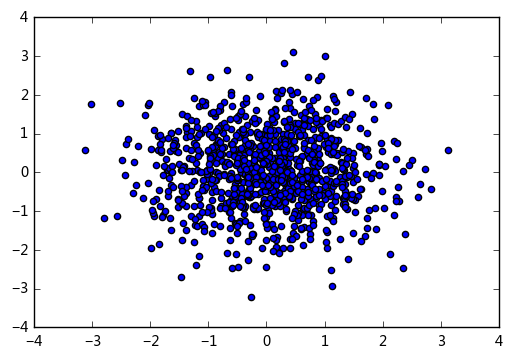

In [18]:
#  numpy.random.randn(d0, d1, ..., dn)：生成一个浮点数或N维浮点数组 —— 正态分布

samples1 = np.random.randn(1000)
samples2 = np.random.randn(1000)
plt.scatter(samples1,samples2)
# randn和rand的参数用法一样
# 生成1000个正太的样本值

In [19]:
# numpy.random.randint(low, high=None, size=None, dtype='l')：生成一个整数或N维整数数组
# 若high不为None时，取[low,high)之间随机整数，否则取值[0,low)之间随机整数，且high必须大于low 
# dtype参数：只能是int类型  

print(np.random.randint(2))
# low=2：生成1个[0,2)之间随机整数  

print(np.random.randint(2,size=5))
# low=2,size=5 ：生成5个[0,2)之间随机整数

print(np.random.randint(2,6,size=5))
# low=2,high=6,size=5：生成5个[2,6)之间随机整数  

print(np.random.randint(2,size=(2,3)))
# low=2,size=(2,3)：生成一个2x3整数数组,取数范围：[0,2)随机整数 

print(np.random.randint(2,6,(2,3)))
# low=2,high=6,size=(2,3)：生成一个2*3整数数组,取值范围：[2,6)随机整数  

0
[0 1 1 0 1]
[2 5 2 3 5]
[[0 1 1]
 [1 1 1]]
[[4 4 3]
 [2 3 3]]


## 5. Numpy数据的输入输出

* numpy读取/写入数组数据、文本数据



In [20]:
# 存储数组数据 .npy文件

import os
os.chdir('C:/Users/Hjx/Desktop/')

ar = np.random.rand(5,5)
print(ar)
np.save('arraydata.npy', ar)
# 也可以直接 np.save('C:/Users/Hjx/Desktop/arraydata.npy', ar)

[[ 0.57358458  0.71126411  0.22317828  0.69640773  0.97406015]
 [ 0.83007851  0.63460575  0.37424462  0.49711017  0.42822812]
 [ 0.51354459  0.96671598  0.21427951  0.91429226  0.00393325]
 [ 0.680534    0.31516091  0.79848663  0.35308657  0.21576843]
 [ 0.38634472  0.47153005  0.6457086   0.94983697  0.97670458]]


In [21]:
# 读取数组数据 .npy文件

ar_load =np.load('arraydata.npy')
print(ar_load)
# 也可以直接 np.load('C:/Users/Hjx/Desktop/arraydata.npy')

[[ 0.57358458  0.71126411  0.22317828  0.69640773  0.97406015]
 [ 0.83007851  0.63460575  0.37424462  0.49711017  0.42822812]
 [ 0.51354459  0.96671598  0.21427951  0.91429226  0.00393325]
 [ 0.680534    0.31516091  0.79848663  0.35308657  0.21576843]
 [ 0.38634472  0.47153005  0.6457086   0.94983697  0.97670458]]


In [22]:
# 存储/读取文本文件

ar = np.random.rand(5,5)
np.savetxt('array.txt',ar, delimiter=',')
# np.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ')：存储为文本txt文件

ar_loadtxt = np.loadtxt('array.txt', delimiter=',')
print(ar_loadtxt)
# 也可以直接 np.loadtxt('C:/Users/Hjx/Desktop/array.txt')

[[ 0.28280684  0.66188985  0.00372083  0.54051044  0.68553963]
 [ 0.9138449   0.37056825  0.62813711  0.83032184  0.70196173]
 [ 0.63438739  0.86552157  0.68294764  0.2959724   0.62337767]
 [ 0.67411154  0.87678919  0.53732168  0.90366896  0.70480366]
 [ 0.00936579  0.32914898  0.30001813  0.66198967  0.04336824]]
